In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [2]:
mitbih = pd.read_csv("mitbih_test.csv", header=None)
mitbih_train = pd.read_csv("mitbih_train.csv", header=None)

In [158]:
import numpy as np

#data = np.zeros((mitbih_train.shape[0], mitbih_train[1] - 1))
data = mitbih_train.iloc[:, :186]
labels = mitbih_train.iloc[:, 187]
print(labels)

mitbih[187]=mitbih[187].astype(int)
equilibre=mitbih[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int32
Ukupno:
U klasi normalnih                      :  18118
U klasi supraventrikularnih ektopičnih :  556
U klasi ventrikularnih ektopičnih      :  1448
U klasi spojenih                       :  162
U klasi nepoznatih                     :  1608


In [115]:
#Dataset skew, undersampling
#Izvrsiti ovu celiju ako se koristi undersampling

mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)

df_0=mitbih_train[mitbih_train[187]==0]
df_1=mitbih_train[mitbih_train[187]==1]
df_2=mitbih_train[mitbih_train[187]==2]
df_3=mitbih_train[mitbih_train[187]==3]
df_4=mitbih_train[mitbih_train[187]==4]

#Undersampling
df_0_under = df_0.sample(2*6431)
df_under = pd.concat([df_0_under, df_1, df_2, df_3, df_4], axis=0)

equilibre=df_under[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

data = df_under.iloc[:, :186]
labels = df_under.iloc[:, 187]

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  12862
U klasi supraventrikularnih ektopičnih :  2223
U klasi ventrikularnih ektopičnih      :  5788
U klasi spojenih                       :  641
U klasi nepoznatih                     :  6431


In [147]:
#Dataset skew, oversampling
#Izvrsiti ovu celiju ako se koristi oversampling

mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)

df_0=mitbih_train[mitbih_train[187]==0]
df_1=mitbih_train[mitbih_train[187]==1]
df_2=mitbih_train[mitbih_train[187]==2]
df_3=mitbih_train[mitbih_train[187]==3]
df_4=mitbih_train[mitbih_train[187]==4]

#Oversampling
df_1_over = df_1.sample(72471, replace = True)
df_2_over = df_2.sample(72471, replace = True)
df_3_over = df_3.sample(72471, replace = True)
df_4_over = df_4.sample(72471, replace = True)

df_over = pd.concat([df_0, df_1_over, df_2_over, df_3_over, df_4_over], axis=0)

equilibre=df_over[187].value_counts()
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])

data = df_under.iloc[:, :186]
labels = df_under.iloc[:, 187]

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  72471
U klasi supraventrikularnih ektopičnih :  72471
U klasi ventrikularnih ektopičnih      :  72471
U klasi spojenih                       :  72471
U klasi nepoznatih                     :  72471


In [148]:
from keras.utils import to_categorical

one_hot_labels = np.zeros((len(labels), 5))
one_hot_labels[:] = to_categorical(labels[:], num_classes = 5)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.33, random_state=42)

In [150]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(50, input_dim=186, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer = Adam(lr = 100e-5), loss="categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=15, shuffle=True, class_weight='auto')

C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=186, activation="relu", kernel_initializer="normal")`
  import sys
C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="normal")`
  if __name__ == '__main__':


Train on 14978 samples, validate on 3745 samples
Epoch 1/15
14978/14978 [==============================] - 2s 157us/step - loss: 0.9122 - accuracy: 0.6774 - val_loss: 0.6331 - val_accuracy: 0.7797
Epoch 2/15
14978/14978 [==============================] - 1s 56us/step - loss: 0.6429 - accuracy: 0.7730 - val_loss: 0.4941 - val_accuracy: 0.8401
Epoch 3/15
14978/14978 [==============================] - 1s 57us/step - loss: 0.5319 - accuracy: 0.8232 - val_loss: 0.4228 - val_accuracy: 0.8681
Epoch 4/15
14978/14978 [==============================] - 1s 61us/step - loss: 0.4739 - accuracy: 0.8428 - val_loss: 0.3890 - val_accuracy: 0.8748
Epoch 5/15
14978/14978 [==============================] - 1s 50us/step - loss: 0.4380 - accuracy: 0.8558 - val_loss: 0.3654 - val_accuracy: 0.8836
Epoch 6/15
14978/14978 [==============================] - 1s 49us/step - loss: 0.4159 - accuracy: 0.8595 - val_loss: 0.3378 - val_accuracy: 0.8921
Epoch 7/15
14978/14978 [==============================] - 1s 49us/st

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 50)                9350      
_________________________________________________________________
dropout_21 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_22 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 5)                 155       
Total params: 11,035
Trainable params: 11,035
Non-trainable params: 0
_________________________________________________________________
None


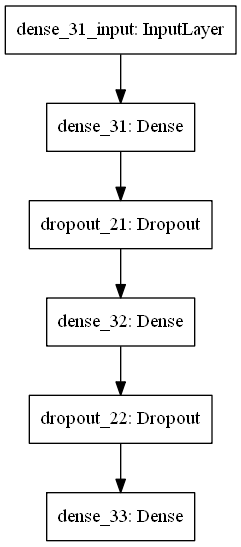

In [151]:
from keras.utils.vis_utils import plot_model

print(model.summary())

import keras

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import pydot
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

plot_model(model, to_file='dense_mitbih.png')

In [152]:
print(model.evaluate(X_test, y_test))

9222/9222 [==============================] - 0s 18us/step
[0.26726193471731524, 0.9090219140052795]


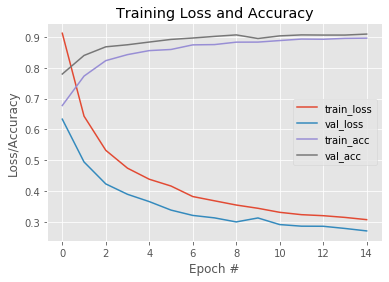

In [153]:
N = np.arange(0, 15)
title = "Training Loss and Accuracy"
 
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [154]:
data_validation = mitbih.iloc[:, :186]
labels_validation = mitbih.iloc[:, 187]

one_hot_labels_validation = np.zeros((len(labels_validation), 5))
one_hot_labels_validation[:] = to_categorical(labels_validation[:], num_classes = 5)

predictions = model.predict(data_validation)
predictions = np.where(predictions < 0.5, 0, 1)

In [155]:
import sklearn

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = sklearn.metrics.accuracy_score(one_hot_labels_validation, predictions)

print("Accuracy: {0:.2f}".format(100.0 * accuracy_score(one_hot_labels_validation, predictions)))
print("Precision: {0:.2f}".format(100.0 * precision_score(one_hot_labels_validation, predictions, average='micro')))
print("F1 score: {0:.2f}".format(100.0 * f1_score(one_hot_labels_validation, predictions, average='micro')))

print('Classification Report:')
print(sklearn.metrics.classification_report(one_hot_labels_validation, predictions))


Accuracy: 93.86
Precision: 95.71
F1 score: 94.77
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18118
           1       0.76      0.58      0.66       556
           2       0.83      0.89      0.86      1448
           3       0.57      0.59      0.58       162
           4       0.94      0.92      0.93      1608

   micro avg       0.96      0.94      0.95     21892
   macro avg       0.82      0.79      0.80     21892
weighted avg       0.96      0.94      0.95     21892
 samples avg       0.94      0.94      0.94     21892



C:\Users\damja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


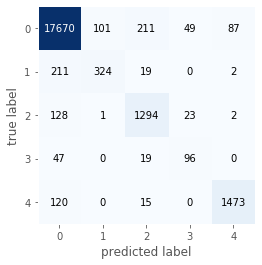

In [156]:
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

validation_numerical = np.argmax(one_hot_labels_validation, axis = 1)
predictions_numerical = np.argmax(predictions, axis = 1)

cm = confusion_matrix(y_target=validation_numerical, 
                      y_predicted=predictions_numerical, 
                      binary=False)
cm
fig, ax = plot_confusion_matrix(cm)
plt.show()